<a href="https://colab.research.google.com/github/vikram2727/Volve-ML/blob/main/Copy_of_Project_1_KVLOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 0. Import libraries and git clone

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!git clone  https://github.com/vikram2727/o-g_data_analsis

fatal: destination path 'o-g_data_analsis' already exists and is not an empty directory.


In [ ]:
!pip install lasio
import lasio

## Step 1. Load and Display the Well-log Datasets

In [ ]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("/content/o-g_data_analsis/well_logs", "*.las")))

well_df = [0] * 3

for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  # convert to dataframe
  df = well.df()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column
  well_df[i] = df.reset_index()

well1, well2, well3 = well_df


In [ ]:
well1.head()

,DEPTH,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,KLOGH,M,N,PERF_FLAG,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,VSH
0,3666.5916,8.5,0.111705,0.0,0.0,0.1475,115.0,14.0,0.000163,0.0003,0.0003,1.79,2.45,NaN,0.199843,0.199843,0.8,2.66,0.021643,0.0,0.5590,1.8023,112.7249,0.598800
1,3666.7440,8.5,0.112236,0.0,0.0,0.3583,115.0,14.0,0.000003,0.0000,0.0000,1.79,2.45,NaN,0.218743,0.218743,0.8,2.66,0.021642,0.0,0.5131,7.9467,112.7285,0.599555
2,3666.8964,8.5,0.114825,0.0,0.0,0.1298,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.242380,0.242380,0.8,2.66,0.021642,0.0,0.4737,6.5907,112.7321,0.600310
3,3667.0488,8.5,0.114419,0.0,0.0,0.2489,115.0,14.0,0.000002,0.0000,0.0000,1.79,2.45,NaN,0.226408,0.226408,0.8,2.66,0.021641,0.0,0.5054,8.6274,112.7358,0.601065
4,3667.2012,8.5,0.115867,0.0,0.0,0.2072,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.216169,0.216169,0.8,2.66,0.021640,0.0,0.5360,6.8473,112.7394,0.601820


In [ ]:
well2.head()

,DEPTH,BVW,CARB_FLAG,COAL_FLAG,KLOGH,KLOGV,PHIF,RHOFL,RHOMA,RW,SAND_FLAG,SW,TEMP,VSH
0,3768.0900,0.034643,0.0,0.0,0.0002,0.0001,0.034643,0.9,2.66,0.021472,0.0,1.0,113.7916,0.6610
1,3768.2424,0.032957,0.0,0.0,0.0001,0.0000,0.032957,0.9,2.66,0.021472,0.0,1.0,113.7951,0.6946
2,3768.3948,0.010825,0.0,0.0,0.0000,0.0000,0.010825,0.9,2.66,0.021471,0.0,1.0,113.7986,0.7812
3,3768.5472,0.017037,0.0,0.0,0.0000,0.0000,0.017037,0.9,2.66,0.021471,0.0,1.0,113.8022,0.9155
4,3768.6996,0.044282,0.0,0.0,0.0000,0.0000,0.044282,0.9,2.66,0.021470,0.0,1.0,113.8057,0.9545


In [ ]:
well3.head()

,DEPTH,BWV,DT,KLOGH,KLOGV,PHIF,SAND_FLAG,SW,VSH
0,3549.7008,0.08183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3549.8532,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
2,3550.0056,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
3,3550.1580,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
4,3550.3104,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN


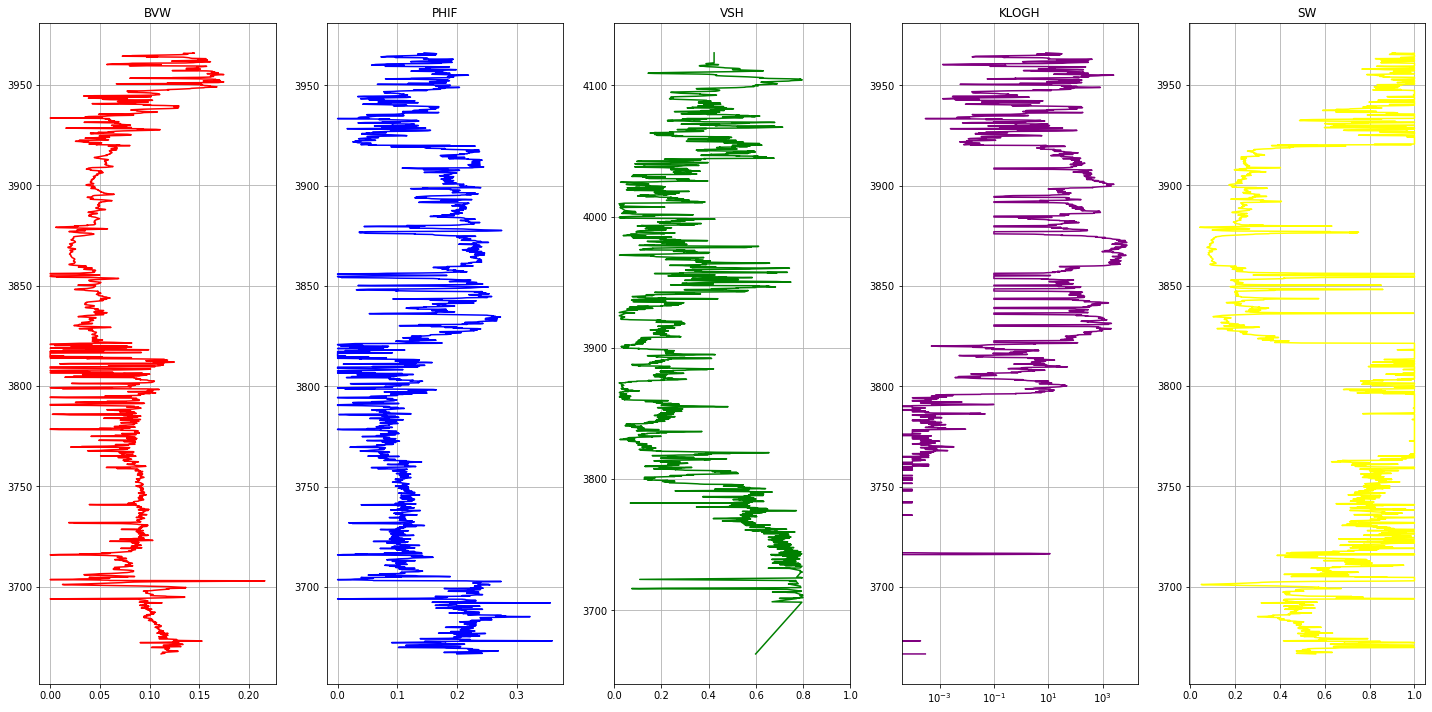

In [ ]:
# Display train well data
well = well1 # train wells: well1, well3, well4

# define what logs are we going to us
logs = ['BVW','PHIF','VSH','KLOGH','SW']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['red', 'blue', 'green', 'purple','yellow']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 1)
#ax[4].set_xlim(0, 1000)
#ax[].set_xlim(0, 1000)
plt.tight_layout(1.1)
plt.show()

In [ ]:
well3.info(verbose = False, buf=None, max_cols=None, memory_usage=None, null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Columns: 9 entries, DEPTH to VSH
dtypes: float64(9)
memory usage: 493.2 KB


In [ ]:
well3.rename(columns = {'BWV':'BVW'}, inplace = True) 

In [ ]:
well3.head()

,DEPTH,BVW,DT,KLOGH,KLOGV,PHIF,SAND_FLAG,SW,VSH
0,3549.7008,0.08183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3549.8532,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
2,3550.0056,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
3,3550.1580,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
4,3550.3104,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#step 2

## Step 2. Data Preparation

In [ ]:
# lower limit
low = [3750,4000,4350]

# upper limit
up = [3925,4175,4578]

# train columns to use
train_cols = ['DEPTH','PHIF','SW','VSH','BVW', 'KLOGH', 'KLOGV']

# test columns to use
test_cols = ['DEPTH','PHIF','SW','VSH','BVW', 'KLOGH']

well_df_restrict = [0] * 3

for i in range(len(well_df)):
  # restrict depth within the given lower and upper limit
  df = well_df[i].loc[(well_df[i]['DEPTH'] >= low[i]) & (well_df[i]['DEPTH'] <= up[i])]

  if i == 1 or i == 2:
    # the train data, drop unwanted columns
    well_df_restrict[i] = df[train_cols]
  
  else:
    # the test data, drop unwanted columns
    well_df_restrict[i] = df[test_cols]

well1, well2, well3 = well_df_restrict

# as we can see, both ends already not have NaNs
well2

,DEPTH,PHIF,SW,VSH,BVW,KLOGH,KLOGV
1522,4000.0428,0.192539,0.7810,0.3245,0.150375,4.1637,2.5773
1523,4000.1952,0.174444,0.8388,0.3075,0.146332,4.2437,2.6299
1524,4000.3476,0.178971,0.7885,0.3152,0.141122,3.9319,2.4252
1525,4000.5000,0.161387,0.8589,0.3124,0.138617,3.0138,1.8287
1526,4000.6524,0.160796,0.8945,0.2904,0.143829,4.7025,2.9327
...,...,...,...,...,...,...,...
2666,4174.3884,0.214303,0.9390,0.3211,0.201236,6.6812,4.2578
2667,4174.5408,0.206296,0.9921,0.3238,0.204659,5.4499,3.4298
2668,4174.6932,0.213705,0.9791,0.3358,0.209230,4.8717,3.0448
2669,4174.8456,0.228563,0.9521,0.3888,0.217608,2.1338,1.2675


In [ ]:
well3

,DEPTH,PHIF,SW,VSH,BVW,KLOGH,KLOGV
5252,4350.1056,0.139508,0.9251,0.5862,0.127651,0.060,0.0286
5253,4350.2580,0.137625,0.9392,0.5526,0.129053,0.057,0.0271
5254,4350.4104,0.134995,0.9558,0.5295,0.129257,0.053,0.0251
5255,4350.5628,0.134038,0.9602,0.4764,0.129032,0.051,0.0241
5256,4350.7152,0.133967,0.9566,0.4561,0.128707,0.051,0.0241
...,...,...,...,...,...,...,...
6743,4577.3340,0.085148,1.0000,0.4265,0.084102,0.013,0.0056
6744,4577.4864,0.087897,1.0000,0.4266,0.085148,0.014,0.0061
6745,4577.6388,0.094013,1.0000,0.4269,0.087897,0.017,0.0075
6746,4577.7912,0.095935,1.0000,0.4325,0.094013,0.018,0.0080


In [ ]:
well1

,DEPTH,PHIF,SW,VSH,BVW,KLOGH
548,3750.1068,0.117154,0.7711,0.698306,0.090335,0.0000
549,3750.2592,0.096855,0.8904,0.695680,0.086235,0.0000
550,3750.4116,0.105343,0.8467,0.746666,0.089198,0.0000
551,3750.5640,0.108590,0.8377,0.711248,0.090969,0.0000
552,3750.7164,0.113957,0.8144,0.717538,0.092811,0.0000
...,...,...,...,...,...,...
1691,3924.3000,0.066997,0.9652,0.025366,0.057907,0.1501
1692,3924.4524,0.049259,1.0000,0.021564,0.049259,0.0341
1693,3924.6048,0.056189,1.0000,0.023790,0.056189,0.0622
1694,3924.7572,0.096597,0.8304,0.026016,0.071062,1.1717


In [ ]:
print(well1.isnull().sum())
well3.info()


DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 5252 to 6747
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   1496 non-null   float64
 1   PHIF    1496 non-null   float64
 2   SW      1496 non-null   float64
 3   VSH     1496 non-null   float64
 4   BVW     1496 non-null   float64
 5   KLOGH   1496 non-null   float64
 6   KLOGV   1496 non-null   float64
dtypes: float64(7)
memory usage: 93.5 KB


In [ ]:
print(well2.isnull().sum())
well2.info()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 1522 to 2670
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   1149 non-null   float64
 1   PHIF    1149 non-null   float64
 2   SW      1149 non-null   float64
 3   VSH     1149 non-null   float64
 4   BVW     1149 non-null   float64
 5   KLOGH   1149 non-null   float64
 6   KLOGV   1149 non-null   float64
dtypes: float64(7)
memory usage: 71.8 KB


In [ ]:
print(well3.isnull().sum())
well3.info()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 5252 to 6747
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   1496 non-null   float64
 1   PHIF    1496 non-null   float64
 2   SW      1496 non-null   float64
 3   VSH     1496 non-null   float64
 4   BVW     1496 non-null   float64
 5   KLOGH   1496 non-null   float64
 6   KLOGV   1496 non-null   float64
dtypes: float64(7)
memory usage: 93.5 KB


In [ ]:
avg = well1['PHIF'].mean()
well1['PHIF'].fillna(value = avg ,  inplace=True)
avg = well1['SW'].mean()
well1['SW'].fillna(value = avg ,  inplace=True)
avg = well1['KLOGH'].mean()
well1['KLOGH'].fillna(value = avg ,  inplace=True)
avg = well1['BVW'].mean()
well1['BVW'].fillna(value = avg ,  inplace=True)

In [ ]:
avg = well2['KLOGV'].mean()
well2['KLOGV'].fillna(value = avg ,  inplace=True)

In [ ]:
avg = well3['VSH'].mean()
well3['VSH'].fillna(value = avg ,  inplace=True)
avg = well3['KLOGV'].mean()
well3['KLOGV'].fillna(value = avg ,  inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
well1.isnull().sum()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
dtype: int64

In [ ]:
well2.isnull().sum()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
dtype: int64

In [ ]:
well3.isnull().sum()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
dtype: int64

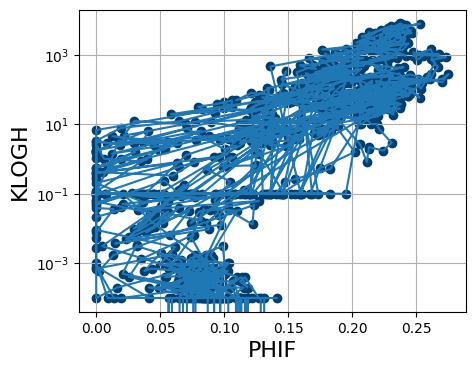

In [ ]:
# Cross plot comparing GR to Deep Resistivity
from statistics import mean
xs = well1.PHIF.values
ys = well1.KLOGH.values
plt.figure(figsize=(5,4), dpi=100) # figure size and dpi you can set here
plt.scatter(xs, ys, color='blue', marker='.', alpha=0.3)
plt.yscale('log') #log scale for Y axis

plt.grid(True)
plt.xlabel('PHIF', size=16)
plt.ylabel('KLOGH', size=16)
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, ys)
plt.show()

In [ ]:
# merge dataframes
well_train = pd.concat([well2, well3])
well_pred = pd.concat([well1])

# assign names
names = ['15_9-19 A', '15_9-19 BT2', '15_9-19 SR']

names_train = []
names_pred = []
for i in range(len(well_df_restrict)):
  if i == 2 or i == 1 :
    # train data, assign names 
    _ = np.full(len(well_df_restrict[i]), names[i])
    names_train.append(_)
  else:
    # test data, assign names
    _ = np.full(len(well_df_restrict[i]), names[i])
    names_pred.append(_)

# concatenate inside list
import itertools

names_train = list(itertools.chain.from_iterable(names_train))
names_pred = list(itertools.chain.from_iterable(names_pred))

# include well names to the train and pred dataframe
well_train['WELL'] = names_train
well_pred['WELL'] = names_pred

# move the depth column to the right
depth_train, depth_pred = well_train.pop('DEPTH'), well_pred.pop('DEPTH')
well_train['DEPTH'], well_pred['DEPTH'] = depth_train, depth_pred

well_pred

,PHIF,SW,VSH,BVW,KLOGH,WELL,DEPTH
548,0.117154,0.7711,0.698306,0.090335,0.0000,15_9-19 A,3750.1068
549,0.096855,0.8904,0.695680,0.086235,0.0000,15_9-19 A,3750.2592
550,0.105343,0.8467,0.746666,0.089198,0.0000,15_9-19 A,3750.4116
551,0.108590,0.8377,0.711248,0.090969,0.0000,15_9-19 A,3750.5640
552,0.113957,0.8144,0.717538,0.092811,0.0000,15_9-19 A,3750.7164
...,...,...,...,...,...,...,...
1691,0.066997,0.9652,0.025366,0.057907,0.1501,15_9-19 A,3924.3000
1692,0.049259,1.0000,0.021564,0.049259,0.0341,15_9-19 A,3924.4524
1693,0.056189,1.0000,0.023790,0.056189,0.0622,15_9-19 A,3924.6048
1694,0.096597,0.8304,0.026016,0.071062,1.1717,15_9-19 A,3924.7572


In [ ]:
well_train

,PHIF,SW,VSH,BVW,KLOGH,KLOGV,WELL,DEPTH
1522,0.192539,0.7810,0.3245,0.150375,4.1637,2.5773,15_9-19 BT2,4000.0428
1523,0.174444,0.8388,0.3075,0.146332,4.2437,2.6299,15_9-19 BT2,4000.1952
1524,0.178971,0.7885,0.3152,0.141122,3.9319,2.4252,15_9-19 BT2,4000.3476
1525,0.161387,0.8589,0.3124,0.138617,3.0138,1.8287,15_9-19 BT2,4000.5000
1526,0.160796,0.8945,0.2904,0.143829,4.7025,2.9327,15_9-19 BT2,4000.6524
...,...,...,...,...,...,...,...,...
6743,0.085148,1.0000,0.4265,0.084102,0.0130,0.0056,15_9-19 SR,4577.3340
6744,0.087897,1.0000,0.4266,0.085148,0.0140,0.0061,15_9-19 SR,4577.4864
6745,0.094013,1.0000,0.4269,0.087897,0.0170,0.0075,15_9-19 SR,4577.6388
6746,0.095935,1.0000,0.4325,0.094013,0.0180,0.0080,15_9-19 SR,4577.7912


In [ ]:
well_pred.isnull().sum()

PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
WELL     0
DEPTH    0
dtype: int64

In [ ]:
well_train.isnull().sum()

PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
KLOGV    0
WELL     0
DEPTH    0
dtype: int64

## Step 3. Exploratory Data Analysis

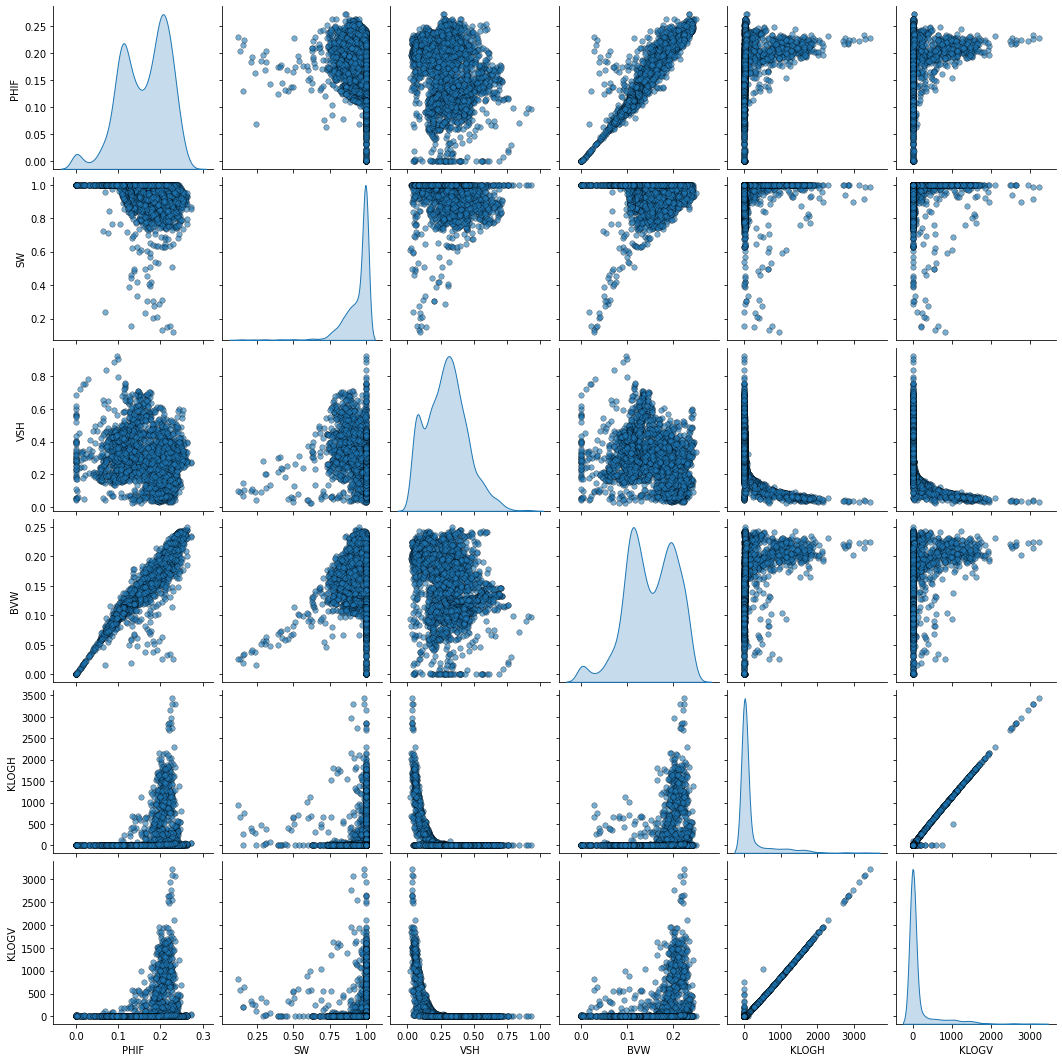

In [ ]:
train_features = ['PHIF','SW','VSH','BVW', 'KLOGH', 'KLOGV']

sns.pairplot(well_train, vars=train_features, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

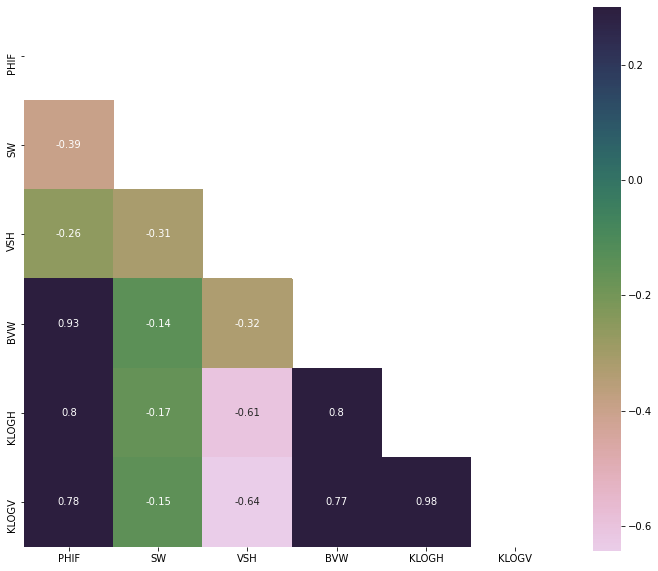

In [ ]:
well_train_only_features = well_train[train_features]

# Generate a mask for the upper triangle
mask = np.zeros_like(well_train_only_features.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(well_train_only_features.corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=.3, square=True)

plt.show()

## Step 4. Normalization

In [ ]:
colnames = well_train.columns
only_feature = ['PHIF','SW','VSH','BVW', 'KLOGH'] # only feature column names
only_target = 'KLOGV' # only target column names
feature_target = np.append(only_feature, only_target) # feature and target column names

colnames

Index(['PHIF', 'SW', 'VSH', 'BVW', 'KLOGH', 'KLOGV', 'WELL', 'DEPTH'], dtype='object')

In [ ]:
np.isnan(well1.any()) #and gets False
np.isfinite(well1.all()) #and gets True

DEPTH    True
PHIF     True
SW       True
VSH      True
BVW      True
KLOGH    True
dtype: bool

In [ ]:
np.isnan(well2.any()) #and gets False
np.isfinite(well2.all()) #and gets True

DEPTH    True
PHIF     True
SW       True
VSH      True
BVW      True
KLOGH    True
KLOGV    True
dtype: bool

In [ ]:
np.isnan(well3.any()) #and gets False
np.isfinite(well3.all()) #and gets True

DEPTH    True
PHIF     True
SW       True
VSH      True
BVW      True
KLOGH    True
KLOGV    True
dtype: bool

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# transform the RT to logarithmic
#well_train['KLOGH'] = np.log10(well_train['KLOGH'])

# normalize using power transform Yeo-Johnson method
scaler = PowerTransformer(method='yeo-johnson')

## ColumnTransformer
column_drop = ['WELL', 'DEPTH']
ct = ColumnTransformer([('transform', scaler, feature_target)], remainder='passthrough')

## fit and transform
well_train_norm = ct.fit_transform(well_train)

## convert to dataframe
well_train_norm = pd.DataFrame(well_train_norm, columns=colnames)
well_train_norm

,PHIF,SW,VSH,BVW,KLOGH,KLOGV,WELL,DEPTH
0,0.493515,-1.78227,0.290076,-0.0808724,0.222623,0.0766828,15_9-19 BT2,4000.04
1,0.135956,-1.53839,0.179852,-0.15698,0.231156,0.0860674,15_9-19 BT2,4000.2
2,0.223038,-1.75866,0.230016,-0.253632,0.196872,0.048455,15_9-19 BT2,4000.35
3,-0.106627,-1.41081,0.211821,-0.299538,0.0764379,-0.0812502,15_9-19 BT2,4000.5
4,-0.117311,-1.10574,0.0669974,-0.203613,0.276951,0.13671,15_9-19 BT2,4000.65
...,...,...,...,...,...,...,...,...
2640,-1.29211,0.849565,0.913296,-1.21187,-0.978742,-0.960326,15_9-19 SR,4577.33
2641,-1.25561,0.849565,0.913877,-1.19586,-0.9778,-0.95982,15_9-19 SR,4577.49
2642,-1.17284,0.849565,0.91562,-1.15351,-0.974983,-0.958405,15_9-19 SR,4577.64
2643,-1.14638,0.849565,0.948062,-1.05789,-0.974046,-0.957901,15_9-19 SR,4577.79


In [ ]:
x = well_train_norm[feature_target].astype(float)
y = well_train_norm['WELL'].astype(str)
z = well_train_norm['DEPTH'].astype(float)

well_train_norm = pd.concat([x, y, z], axis=1)

In [ ]:
# x = well_train_norm[feature_target].astype(float)
#sns.pairplot(well_train_norm, vars=feature_target, diag_kind = 'kde',
          #   plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

## Step 5. Removing Outliers

In [ ]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop = well_train_norm.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop = well_train_norm.drop(['WELL', 'DEPTH'], axis=1)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

## delete all rows that have NaNs
well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop)
mask = yhat != -1
well_train_iso = well_train_norm[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop)
mask = yhat != -1
well_train_ee = well_train_norm[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop)
mask = yhat != -1
well_train_lof = well_train_norm[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

Number of points before outliers removed                       : 2645
Number of points after outliers removed with Standard Deviation: 2642
Number of points after outliers removed with Isolation Forest  : 1323
Number of points after outliers removed with Min. Covariance   : 2380
Number of points after outliers removed with Outlier Factor    : 1851
Number of points after outliers removed with One-class SVM     : 2381


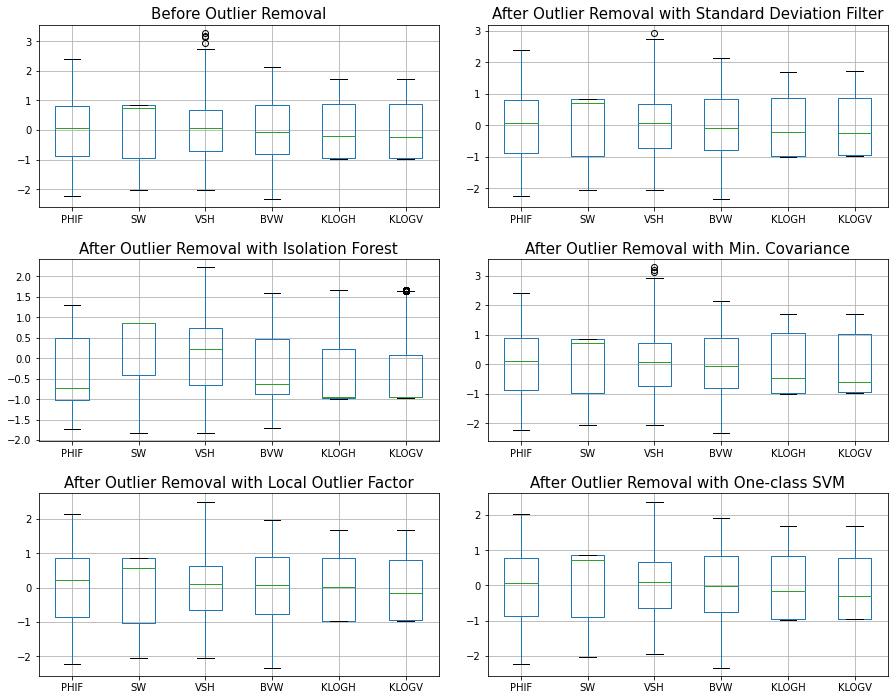

In [ ]:
print('Number of points before outliers removed                       :', len(well_train_norm))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

In [ ]:
#sns.pairplot(well_train_svm, vars=feature_target,
            # diag_kind='kde',
             #plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

## Step 5. Prediction! First Attempt

In [ ]:
# Define the train data
feature = ['PHIF','SW','VSH','BVW', 'KLOGH']
target = 'KLOGV'

X_train = well_train_svm[only_feature].values
y_train = well_train_svm[only_target].values



In [ ]:
well_train_svm

,PHIF,SW,VSH,BVW,KLOGH,KLOGV,WELL,DEPTH
0,0.493515,-1.782272,0.290076,-0.080872,0.222623,0.076683,15_9-19 BT2,4000.0428
1,0.135956,-1.538388,0.179852,-0.156980,0.231156,0.086067,15_9-19 BT2,4000.1952
2,0.223038,-1.758664,0.230016,-0.253632,0.196872,0.048455,15_9-19 BT2,4000.3476
3,-0.106627,-1.410814,0.211821,-0.299538,0.076438,-0.081250,15_9-19 BT2,4000.5000
4,-0.117311,-1.105736,0.066997,-0.203613,0.276951,0.136710,15_9-19 BT2,4000.6524
...,...,...,...,...,...,...,...,...
2640,-1.292114,0.849565,0.913296,-1.211872,-0.978742,-0.960326,15_9-19 SR,4577.3340
2641,-1.255609,0.849565,0.913877,-1.195859,-0.977800,-0.959820,15_9-19 SR,4577.4864
2642,-1.172838,0.849565,0.915620,-1.153509,-0.974983,-0.958405,15_9-19 SR,4577.6388
2643,-1.146379,0.849565,0.948062,-1.057888,-0.974046,-0.957901,15_9-19 SR,4577.7912


In [ ]:
# Define the test data 
well_pred1 = well_train_norm.copy()

names_train = ['15_9-19 BT2', '15_9-19 SR']

X_test = []

y_test = []
for i in range(len(names_train)):
  # split the df with respect to its name
  test = well_pred1.loc[well_pred1['WELL'] == names_train[i]]

  # Drop well name column 
  test = test.drop(['WELL'], axis=1)

  # define X_test (feature) and y_test (target)
  X_test_, y_test_ = test[only_feature].values, test[only_target].values
  
  X_test.append(X_test_)
  y_test.append(y_test_)

# for each well 1, 3, and 4
X_test1, X_test2 = X_test
y_test1, y_test2 = y_test

In [ ]:
X_test1

array([[ 0.49351454, -1.78227216,  0.29007551, -0.08087242,  0.22262327],
       [ 0.13595556, -1.53838784,  0.17985171, -0.15697985,  0.23115589],
       [ 0.22303788, -1.7586642 ,  0.23001641, -0.25363249,  0.19687205],
       ...,
       [ 0.9450102 ,  0.28158918,  0.36228402,  1.14211312,  0.29261772],
       [ 1.28457091, -0.29620412,  0.69021038,  1.33466275, -0.07956507],
       [ 1.20412333, -0.05661142,  0.63634244,  1.32199037, -0.02459868]])

## Step 6 Ensemble learning GradientBoostingRegressor

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Create the regressor
model = GradientBoostingRegressor()
# print(model)

# Fit the regressor to the training data
model.fit(X_train, y_train)

# Predict on well 1
y_pred1 = model.predict(X_test1)
print("R-squared of Well 1: {}".format(model.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("RMSE of Well 1: {}".format(rmse))

# Predict on well 3
y_pred2 = model.predict(X_test2)
print("R-squared of Well 2: {}".format(model.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE of Well 2: {}".format(rmse))


R-squared of Well 1: 0.9578640898592752
RMSE of Well 1: 0.19469040224211445
R-squared of Well 2: 0.9979434852198106
RMSE of Well 2: 0.02651221147842153


In [ ]:
# make the transformer fit to the target
y = well_train[target].values
scaler.fit(y.reshape(-1,1))

# denormalize y_test, y_pred
y_test1, y_pred1 = scaler.inverse_transform(y_test1.reshape(-1,1)), scaler.inverse_transform(y_pred1.reshape(-1,1))
y_test2, y_pred2 = scaler.inverse_transform(y_test2.reshape(-1,1)), scaler.inverse_transform(y_pred2.reshape(-1,1))


In [ ]:
y_test1.shape

(1149, 1)

In [ ]:
y_pred1.shape

(1149, 1)

In [ ]:
y_test2.shape

(1496, 1)

In [ ]:
y_pred2.shape

(1496, 1)

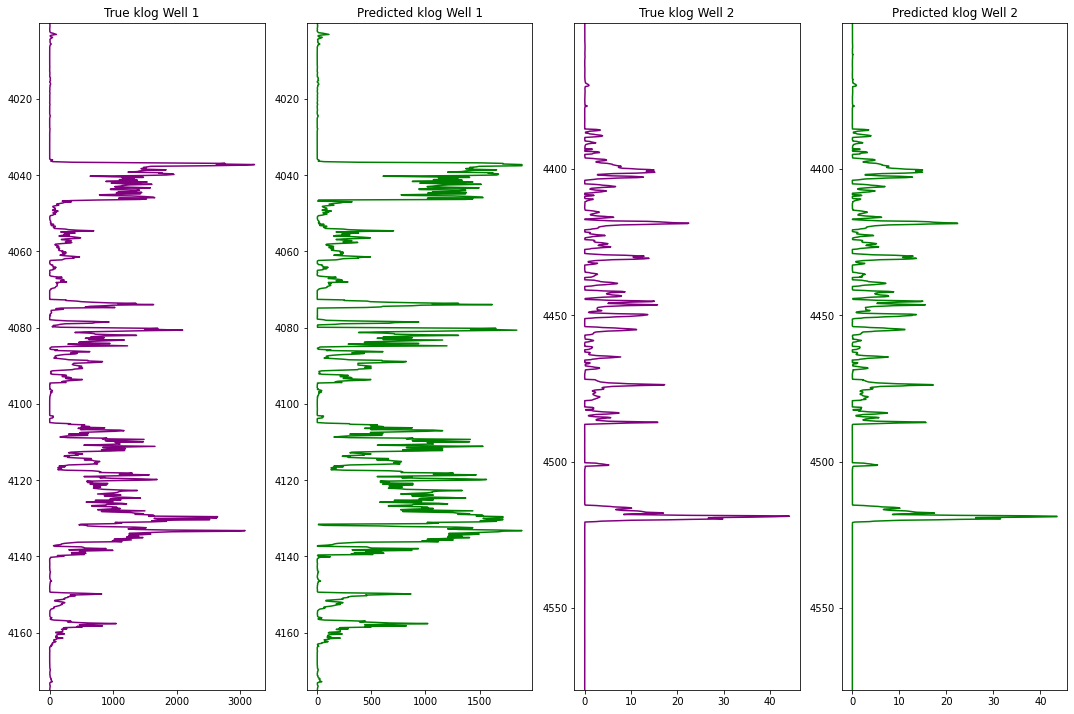

In [ ]:
x = [y_test1, y_pred1, y_test2, y_pred2]
y = [well2['DEPTH'], well2['DEPTH'], well3['DEPTH'], well3['DEPTH']]

color = ['purple', 'green', 'purple', 'green']
title = ['True klog Well 1', 'Predicted klog Well 1', 'True klog Well 2', 'Predicted klog Well 2']
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,10))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  #ax[0].set_xlim(50, 100)
  #ax[1].set_xlim(50, 100)
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])

plt.tight_layout(1)

plt.show()


In [ ]:
well_train_svm

,PHIF,SW,VSH,BVW,KLOGH,KLOGV,WELL,DEPTH
0,0.493515,-1.782272,0.290076,-0.080872,0.222623,0.076683,15_9-19 BT2,4000.0428
1,0.135956,-1.538388,0.179852,-0.156980,0.231156,0.086067,15_9-19 BT2,4000.1952
2,0.223038,-1.758664,0.230016,-0.253632,0.196872,0.048455,15_9-19 BT2,4000.3476
3,-0.106627,-1.410814,0.211821,-0.299538,0.076438,-0.081250,15_9-19 BT2,4000.5000
4,-0.117311,-1.105736,0.066997,-0.203613,0.276951,0.136710,15_9-19 BT2,4000.6524
...,...,...,...,...,...,...,...,...
2640,-1.292114,0.849565,0.913296,-1.211872,-0.978742,-0.960326,15_9-19 SR,4577.3340
2641,-1.255609,0.849565,0.913877,-1.195859,-0.977800,-0.959820,15_9-19 SR,4577.4864
2642,-1.172838,0.849565,0.915620,-1.153509,-0.974983,-0.958405,15_9-19 SR,4577.6388
2643,-1.146379,0.849565,0.948062,-1.057888,-0.974046,-0.957901,15_9-19 SR,4577.7912


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Define the X and y from the SVM normalized dataset
X = well_train_svm[only_feature].values
y = well_train_svm[only_target].values

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 7. Gradient Boosting for Final Prediction

In [ ]:
# Define X_train and y_train
X_train = well_train[only_feature].values
# y_train = well_train[only_target].values.reshape(-1,1)
y_train = well_train[only_target].values

In [ ]:
np.shape(X_train)

(2645, 5)

In [ ]:
np.shape(y_train)

(2645,)

In [ ]:
np.shape(X_test)

(715, 5)

In [ ]:
np.shape(y_test)

(715,)

In [ ]:
well_pred

,PHIF,SW,VSH,BVW,KLOGH,WELL,DEPTH
548,0.117154,0.7711,0.698306,0.090335,0.0000,15_9-19 A,3750.1068
549,0.096855,0.8904,0.695680,0.086235,0.0000,15_9-19 A,3750.2592
550,0.105343,0.8467,0.746666,0.089198,0.0000,15_9-19 A,3750.4116
551,0.108590,0.8377,0.711248,0.090969,0.0000,15_9-19 A,3750.5640
552,0.113957,0.8144,0.717538,0.092811,0.0000,15_9-19 A,3750.7164
...,...,...,...,...,...,...,...
1691,0.066997,0.9652,0.025366,0.057907,0.1501,15_9-19 A,3924.3000
1692,0.049259,1.0000,0.021564,0.049259,0.0341,15_9-19 A,3924.4524
1693,0.056189,1.0000,0.023790,0.056189,0.0622,15_9-19 A,3924.6048
1694,0.096597,0.8304,0.026016,0.071062,1.1717,15_9-19 A,3924.7572


In [ ]:
X_test = []
depths = []


In [ ]:
test = well_pred.drop(['WELL'], axis=1)

In [ ]:
test

,PHIF,SW,VSH,BVW,KLOGH,DEPTH
548,0.117154,0.7711,0.698306,0.090335,0.0000,3750.1068
549,0.096855,0.8904,0.695680,0.086235,0.0000,3750.2592
550,0.105343,0.8467,0.746666,0.089198,0.0000,3750.4116
551,0.108590,0.8377,0.711248,0.090969,0.0000,3750.5640
552,0.113957,0.8144,0.717538,0.092811,0.0000,3750.7164
...,...,...,...,...,...,...
1691,0.066997,0.9652,0.025366,0.057907,0.1501,3924.3000
1692,0.049259,1.0000,0.021564,0.049259,0.0341,3924.4524
1693,0.056189,1.0000,0.023790,0.056189,0.0622,3924.6048
1694,0.096597,0.8304,0.026016,0.071062,1.1717,3924.7572


In [ ]:
only_feature

['PHIF', 'SW', 'VSH', 'BVW', 'KLOGH']

In [ ]:
X_test_ = test[only_feature].values

In [ ]:
X_test_

array([[0.117154, 0.7711  , 0.698306, 0.090335, 0.      ],
       [0.096855, 0.8904  , 0.69568 , 0.086235, 0.      ],
       [0.105343, 0.8467  , 0.746666, 0.089198, 0.      ],
       ...,
       [0.056189, 1.      , 0.02379 , 0.056189, 0.0622  ],
       [0.096597, 0.8304  , 0.026016, 0.071062, 1.1717  ],
       [0.11614 , 0.7506  , 0.028243, 0.078959, 5.8171  ]])

In [ ]:
np.shape(X_test_)

(1148, 5)

In [ ]:
depth_ = test['DEPTH'].values

In [ ]:
depth_

array([3750.1068, 3750.2592, 3750.4116, ..., 3924.6048, 3924.7572,
       3924.9096])

In [ ]:
np.shape(depth_)

(1148,)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
# Normalize X_test of well 1
X_test_ = scaler.fit_transform(X_test_)

# Predict to well 1

y_pred3 = model.predict(X_test_)

# Denormalize y_pred of well 1
# make the transformer fit to the target
y = well_train[target].values
scaler.fit(y.reshape(-1,1))

# denormalize y_test, y_pred
y_pred3 = scaler.inverse_transform(y_pred3.reshape(-1,1))


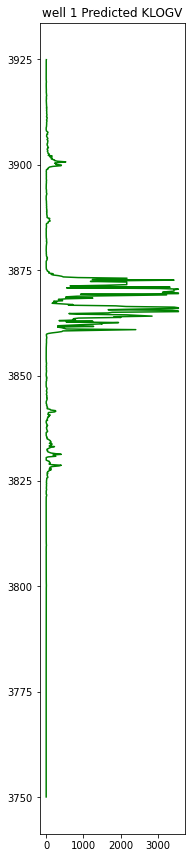

In [ ]:
plt.figure(figsize=(5,12))

plt.subplot(1,2,1)
plt.plot(y_pred3, depth_, color='green')
plt.title('well 1 Predicted KLOGV', size=12)
plt.tight_layout(1)
plt.show()

In [ ]:
well1['KLOGV'] = y_pred3
well1

,DEPTH,PHIF,SW,VSH,BVW,KLOGH,KLOGV
548,3750.1068,0.117154,0.7711,0.698306,0.090335,0.0000,-0.039255
549,3750.2592,0.096855,0.8904,0.695680,0.086235,0.0000,-0.063616
550,3750.4116,0.105343,0.8467,0.746666,0.089198,0.0000,-0.063616
551,3750.5640,0.108590,0.8377,0.711248,0.090969,0.0000,-0.039255
552,3750.7164,0.113957,0.8144,0.717538,0.092811,0.0000,-0.039255
...,...,...,...,...,...,...,...
1691,3924.3000,0.066997,0.9652,0.025366,0.057907,0.1501,0.376342
1692,3924.4524,0.049259,1.0000,0.021564,0.049259,0.0341,0.373439
1693,3924.6048,0.056189,1.0000,0.023790,0.056189,0.0622,0.373439
1694,3924.7572,0.096597,0.8304,0.026016,0.071062,1.1717,1.476176


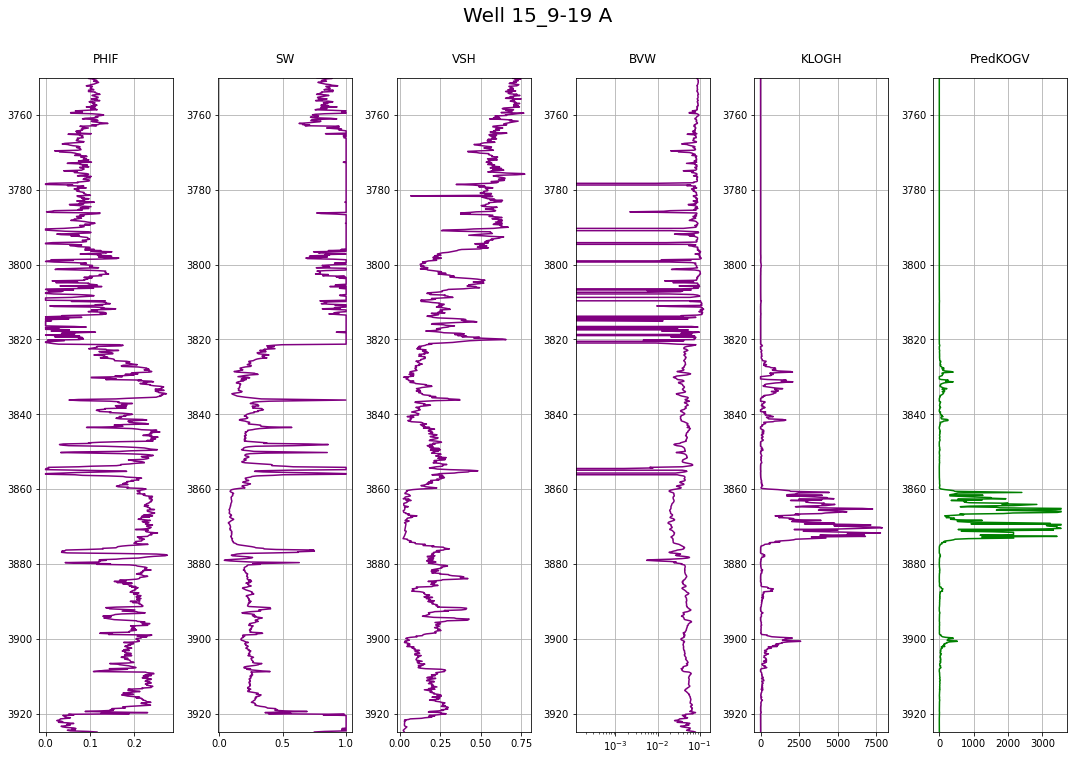

In [ ]:
# Display the test data
well = well1 # test wells: well2, well5

# define what logs are we going to us
logs = ['PHIF','SW','VSH','BVW', 'KLOGH', 'KLOGV']

# titles to show
title = ['PHIF','SW','VSH','BVW', 'KLOGH', 'PredKOGV']
# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(15,10))
fig.suptitle('Well 15_9-19 A', size=20, y=1.05)

# looping each log to display in the subplots

colors = ['purple', 'purple', 'purple', 'purple', 'purple', 'green']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_ylim(max(well['DEPTH']), min(well['DEPTH']))
  ax[i].set_title(title[i], pad=15)
  ax[i].grid(True)

#ax[2].set_xlim(0, 200)
plt.tight_layout(1)
plt.show()